# ORF307 Precept 5

# Converting LPs

Convert the following LP into 2 forms

\begin{array}{ll} \mbox{min} & \|Ax - b\|_1 \\ 
\mbox{subject to} & \|x\|_{\infty} \leq k \\
\end{array} 

form (1)
\begin{array}{ll} \mbox{min} & c^T x \\ 
\mbox{subject to} & Ax \leq b \\
& Cx = d \\
\end{array} 

form (2)
\begin{array}{ll} \mbox{min} & c^T x \\ 
\mbox{subject to} & Ax = b \\
& x \geq 0 \\
\end{array} 

# Steel company operations

A steel company must decide how to allocate next week’s time on a rolling mill, which is a machine that takes unfinished slabs of steel as input and can
produce either of two semi-finished products: bands and coils. The mill’s two products come off the rolling line at different rates: Bands $200 tons/h$ and Coils $140 tons/h$.
They also produce different profits: Bands $\$ 25/ton$ and Coils $ \$30/ton $.
Based on currently booked orders, the following upper bounds are placed on the amount of each product to produce: Bands $6000$ tons and Coils $4000$ tons.
Given that there are $40 h$ of production time available this week, the problem is to decide how many tons of bands and how many tons of coils should be produced to yield the greatest profit. Formulate this problem as a linear
programming problem. Can you solve this problem by inspection?

# The moment problem

Suppose that $Z$ is a random variable
taking values in the set $0,1, \dots , K$, with probabilities $p_O, p_l, \dots ,p_K$, respectively.
We are given the values of the first two moments $E[Z] = \sum_{k=1}^K k p_k$ and $E[Z] = \sum_{k=1}^K k^2 p_k$ of $Z$, and we would like to obtain upper and lower.bounds on the value of the fourth moment $E[Z] = \sum_{k=1}^K k^4 p_k$ of Z. Show how linear programming
can be used to approach this problem.

# Chebyshev center

Consider a set P described by linear
inequality constraints, that is, $P = \{x \in \mathbb{R}^n | a_i^T x \leq b_i \quad  i = 1, \dots ,m\}$. A ball
with center $y$ and radius $r$ is defined as the set of all points within (Euclidean)
distance $r$ from $y$. We are interested in finding a ball with the largest possible
radius, which is entirely contained within the set $P$. (The center of such a ball is
called the Chebychev center of $P$.) Provide a linear programming formulation of
this problem.

sol 1.1659779903259055
xc.value [1.16597799 2.18508012]
r.value [1.16597799]


[(-1.0, 5.0), (-1.0, 5.0)]

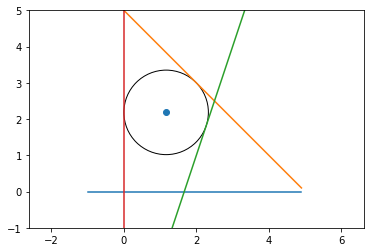

In [15]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

A = np.array([[-1, 0],
              [0, -1],
              [4, 4],
              [3, -1]])
norms = np.linalg.norm(A, axis=1)
b = np.array([0, 0, 20, 5])

xx = np.arange(-1, 5, .1)

y1 = 0*xx
y2 = np.arange(-5, 8, .1)
xx2 = 0*y2
y3 = (b[2] - A[2,0]*xx)/A[2,1]
y4 = (b[3] - A[3,0]*xx)/A[3,1]

plt.plot(xx, y1)
plt.plot(xx, y3)
plt.plot(xx, y4)
plt.plot(xx2, y2)

# setup the LP
r = cp.Variable(1)
xc = cp.Variable(2)

constraints = []
for i in range(4):
    constraints.append(A[i,:] @ xc + norms[i] * r <= b[i])

objective = cp.Maximize(r)
prob = cp.Problem(objective, constraints)
sol = prob.solve()
print('sol', sol)
print('xc.value', xc.value)
print('r.value', r.value)
center = xc.value
circle = plt.Circle((center[0], center[1]), r.value[0], fill=False)
fig = plt.gcf()
ax = fig.gca()
plt.scatter(center[0], center[1])

ax.add_patch(circle)
ax.axis('equal')
ax.set(xlim=(-1, 5), ylim=(-1, 5))